In [ ]:
# setup & dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [ ]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

In [ ]:
# GET COLUMN NAMES FROM BOTH TABLES FOR LATER REFERENCE
inspector = inspect(engine)
measure_cols = inspector.get_columns('measurement')
station_cols = inspector.get_columns('station')

print('measurement table columns: ')
for col in measure_cols:
    print(col['name'],col['type'])


print('\nstation table columns: ')
for col in station_cols:
    print(col['name'],col['type'])

measurement table columns: 
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station table columns: 
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

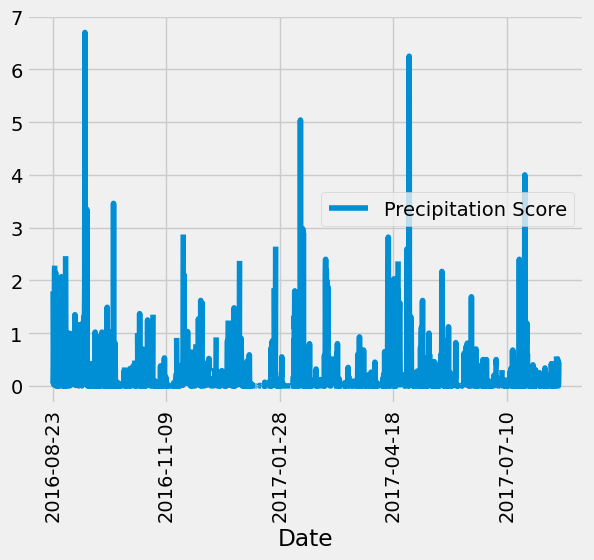

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# ---

# Starting from the most recent data point in the database (2017-08-23) to the date one year from the last date in data set (2016-08-23),
# perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).\
      filter(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23').all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query, columns=['Date', 'Precipitation Score'])

# Sort the dataframe by date
df.sort_values(by='Date', ascending=True, inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='line', x='Date', y='Precipitation Score')
plt.xticks(rotation=90)
plt.show()

In [71]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [136]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(Measurement.station).distinct().count()
print(f'{num_stations} stations in dataset')

9 stations in dataset


In [140]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()) \
    .all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [143]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
    .filter(Measurement.station=='USC00519281') \
    .all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

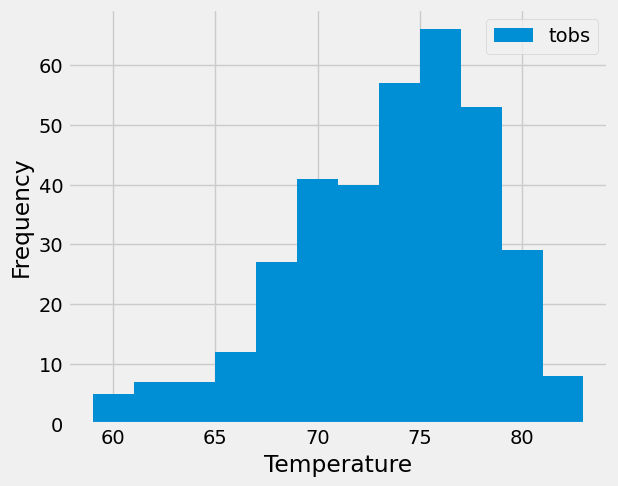

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query = session.query(Measurement.tobs) \
    .filter(Measurement.station=='USC00519281', Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23') \
    .all()

temp_df = pd.DataFrame(temp_query)
temp_df.plot.hist(xlabel='Temperature')
plt.show()

# Close Session

In [183]:
# Close Session
session.close()
